<a href="https://colab.research.google.com/github/nmathew96/Turbolist3r/blob/master/Answers_for_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Observedwaveform.csv to Observedwaveform.csv


In [ ]:
import pandas as pd
file_name = list(uploaded.keys())[0]
observed_waveform_df = pd.read_csv(file_name)

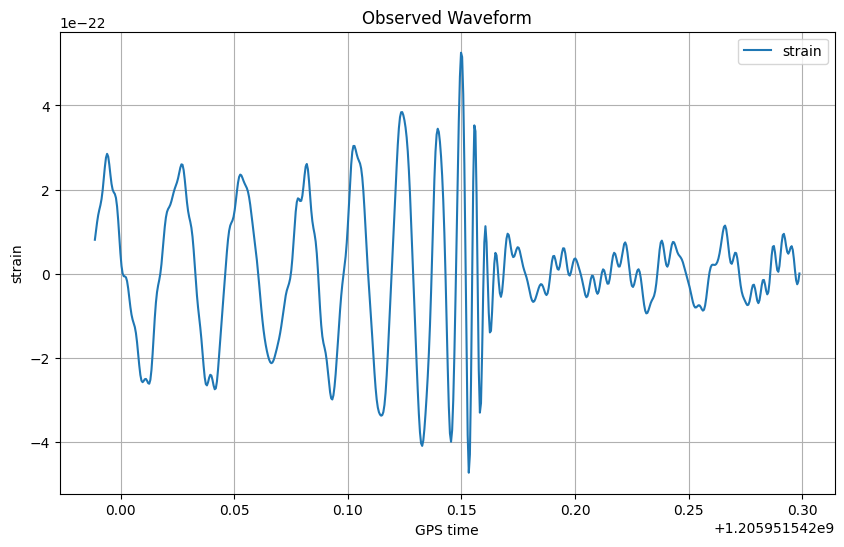

In [ ]:
import matplotlib.pyplot as plt


column_to_plot = 'strain'

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(observed_waveform_df['time (s)'], observed_waveform_df['strain'], label=column_to_plot)
plt.title('Observed Waveform')
plt.xlabel('GPS time')
plt.ylabel('strain')
plt.legend()
plt.grid(True)
plt.show()


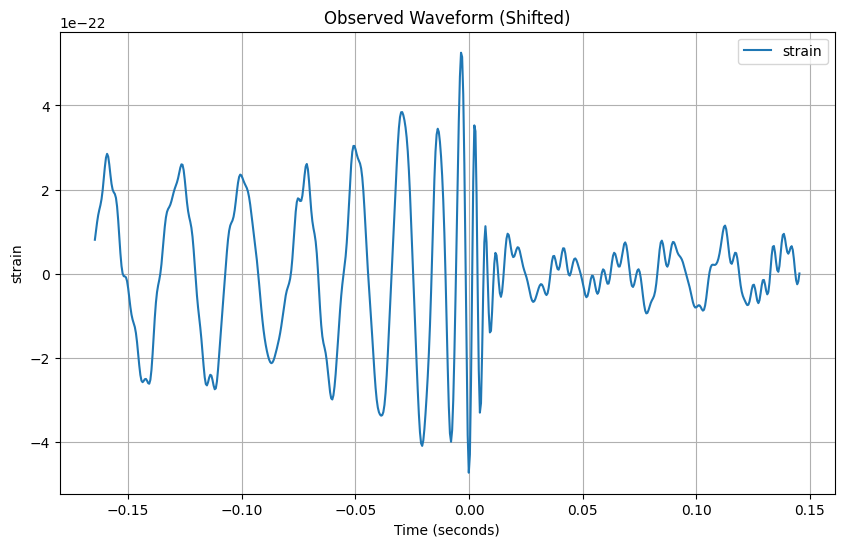

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'strain' is the column you want to plot
column_to_plot = 'strain'

# Time of the merger
merger_time = 1205951542.153363

# Shift the time column
observed_waveform_df['Shifted Time'] = observed_waveform_df['time (s)'] - merger_time

# Plotting the shifted data
plt.figure(figsize=(10, 6))
plt.plot(observed_waveform_df['Shifted Time'], observed_waveform_df[column_to_plot], label=column_to_plot)
plt.title('Observed Waveform (Shifted)')
plt.xlabel('Time (seconds)')
plt.ylabel(column_to_plot)
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from google.colab import files

uploaded = files.upload()


Saving mockData_Mtot40Msun_Dist1Mpc.csv to mockData_Mtot40Msun_Dist1Mpc.csv


In [ ]:
file_name = list(uploaded.keys())[0]
mockData_Mtot40Msun_Dist1Mpc_df = pd.read_csv(file_name)

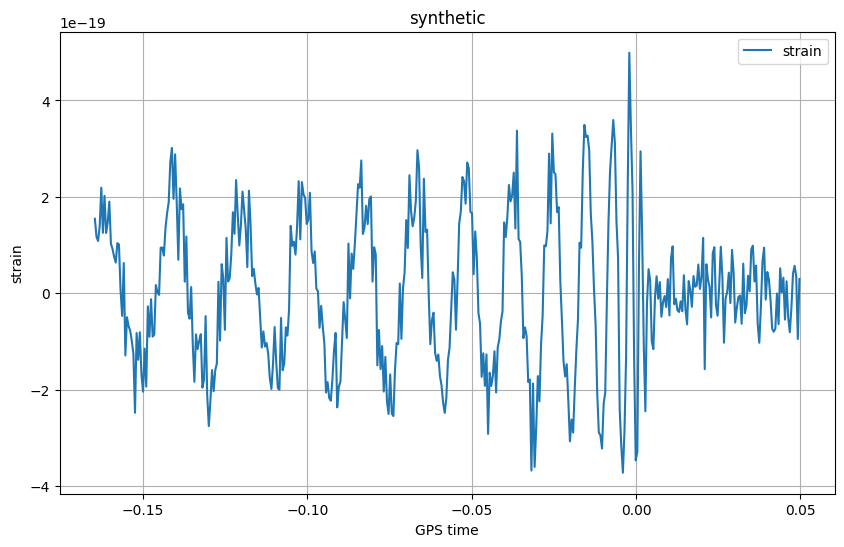

In [ ]:


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mockData_Mtot40Msun_Dist1Mpc_df ['time (s)'], mockData_Mtot40Msun_Dist1Mpc_df ['strain'], label=column_to_plot)
plt.title('synthetic')
plt.xlabel('GPS time')
plt.ylabel('strain')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
t_min = mockData_Mtot40Msun_Dist1Mpc_df['time (s)'].min()
print(t_min)
observed_waveform_filtered = observed_waveform_df[observed_waveform_df['Shifted Time'] >= t_min]
observed_waveform_filtered = observed_waveform_df[observed_waveform_df['Shifted Time'] <= 0]



-0.1646575927734375


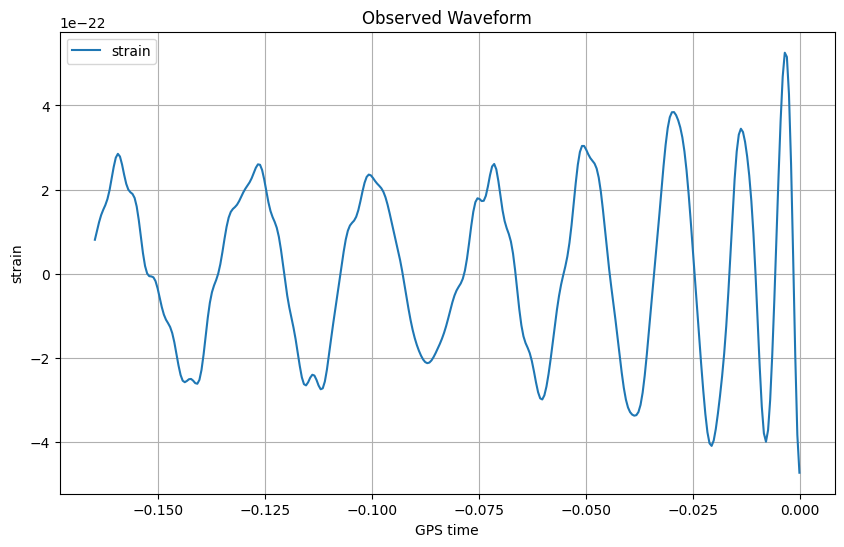

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(observed_waveform_filtered ['Shifted Time'],observed_waveform_filtered ['strain'], label=column_to_plot)
plt.title('Observed Waveform')
plt.xlabel('GPS time')
plt.ylabel('strain')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving reference_Mtot40Msun_Dist1Mpc.csv to reference_Mtot40Msun_Dist1Mpc.csv


In [ ]:
file_name = list(uploaded.keys())[0]
reference_Mtot40Msun_Dist1Mpc_df= pd.read_csv(file_name)

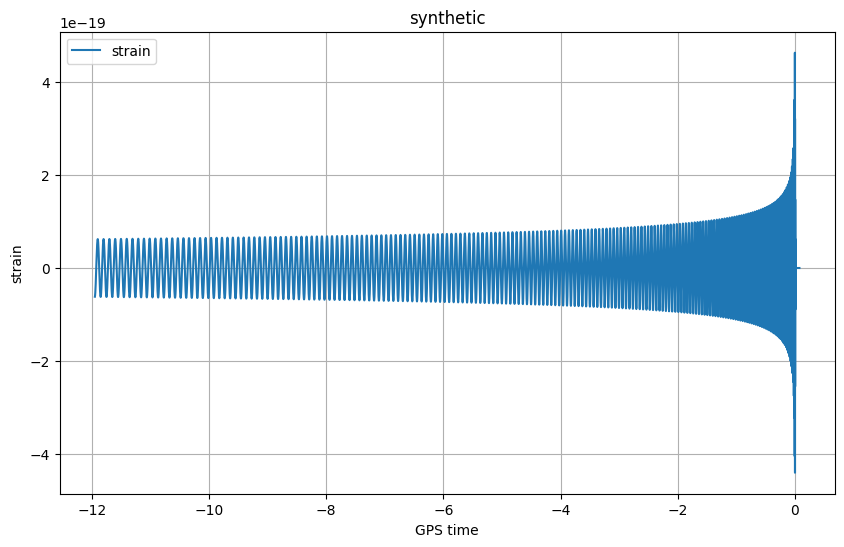

0       -11.946102
1       -11.945614
2       -11.945126
3       -11.944637
4       -11.944149
           ...    
24617     0.073917
24618     0.074406
24619     0.074894
24620     0.075382
24621     0.075871
Name: time (s), Length: 24622, dtype: float64
0     -0.164658
1     -0.164170
2     -0.163681
3     -0.163193
4     -0.162704
         ...   
435    0.047745
436    0.048233
437    0.048722
438    0.049209
439    0.049698
Name: time (s), Length: 440, dtype: float64


In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reference_Mtot40Msun_Dist1Mpc_df ['time (s)'], reference_Mtot40Msun_Dist1Mpc_df['strain'], label=column_to_plot)
plt.title('synthetic')
plt.xlabel('GPS time')
plt.ylabel('strain')
plt.legend()
plt.grid(True)
plt.show()
print(reference_Mtot40Msun_Dist1Mpc_df ['time (s)'])
print(mockData_Mtot40Msun_Dist1Mpc_df ['time (s)'])

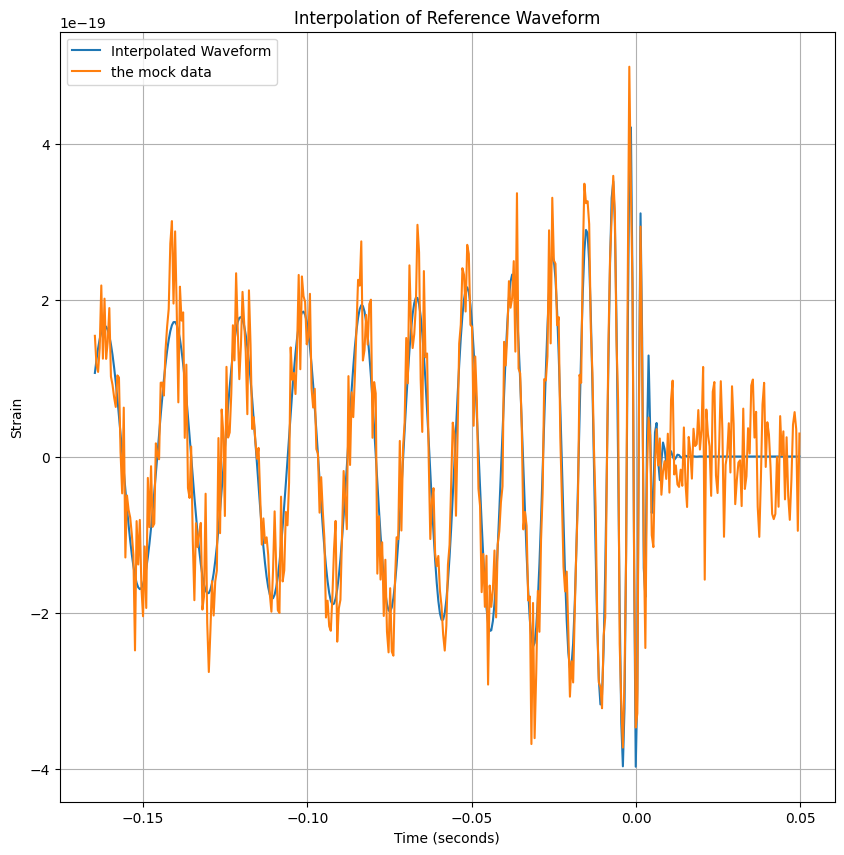

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np



ref_x = reference_Mtot40Msun_Dist1Mpc_df['time (s)'].values
ref_y = reference_Mtot40Msun_Dist1Mpc_df['strain'].values


data_x = mockData_Mtot40Msun_Dist1Mpc_df['time (s)'].values
data_y = mockData_Mtot40Msun_Dist1Mpc_df['strain'].values


interpolated_strains = []
for index in range(len(ref_x)):
  # get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).
  interp_fn = interp1d(ref_x,ref_y,bounds_error=False)
  # now interpolate the data waveform
  interp_strain = interp_fn(data_x)
# plot
plt.figure(figsize=(10, 10))
plt.plot(data_x, interp_strain, label='Interpolated Waveform')
plt.plot(mockData_Mtot40Msun_Dist1Mpc_df ['time (s)'], mockData_Mtot40Msun_Dist1Mpc_df ['strain'], label='the mock data')
plt.title('Interpolation of Reference Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Strain')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mockData_Mtot70Msun_Dist5Mpc.csv to mockData_Mtot70Msun_Dist5Mpc.csv


In [ ]:
import pandas as pd
file_name = list(uploaded.keys())[0]
mockData_Mtot70Msun_Dist5Mpc_df = pd.read_csv(file_name)

In [ ]:

from scipy.interpolate import interp1d
import numpy as np


ref_x1=reference_Mtot40Msun_Dist1Mpc_df ['time (s)']
ref_y1=reference_Mtot40Msun_Dist1Mpc_df['strain']
def generate_waveform(M, D, reference_waveform):
  M_ref = 40.0  # Reference total mass
  D_ref = 1.0
  time_scale = (M / M_ref)
  strain_scale = (M / M_ref) * (D_ref / D)
  time = reference_waveform.x * time_scale
  strain = reference_waveform.y * strain_scale
  return time, strain

ref_x1=reference_Mtot40Msun_Dist1Mpc_df ['time (s)']
ref_y1=reference_Mtot40Msun_Dist1Mpc_df['strain']
M_example = 70.0
D_example = 5.0

for index in range(len(ref_x)):
  reference_waveform = interp1d(ref_x1, ref_y1, bounds_error=False)
  time_example, strain_example = generate_waveform(M_example, D_example, reference_waveform)





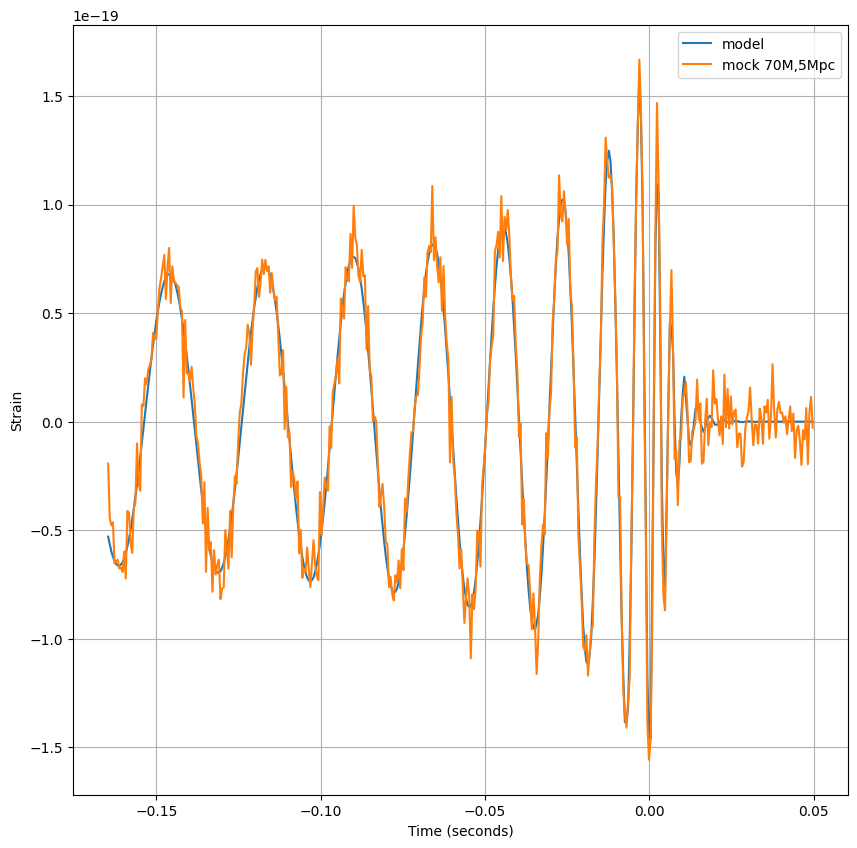

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

data_x1=mockData_Mtot70Msun_Dist5Mpc_df['time (s)']



interpolated_strains = []
for index in range(len(time_example)):
  # get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).
  interp_fn = interp1d(time_example,strain_example,bounds_error=False)
  # now interpolate the data waveform
  interp_strain = interp_fn(data_x1)

plt.figure(figsize=(10, 10))
plt.plot(data_x1, interp_strain, label='model')
plt.plot(mockData_Mtot70Msun_Dist5Mpc_df['time (s)'],mockData_Mtot70Msun_Dist5Mpc_df['strain'],label='mock 70M,5Mpc')
plt.xlabel('Time (seconds)')
plt.ylabel('Strain')
plt.legend()
plt.grid(True)
plt.show()